In [29]:
# -*- coding: utf-8 -*- 
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import sklearn.metrics as mt 
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV 
import joblib 
from sklearn.metrics import confusion_matrix 
t = {'temp':'temp'} 

In [30]:
# 1. 모델 로드
rnd_clf = joblib.load("auto_model.pkl") 
print("\n< AI model: load >") 


< AI model: load >


In [31]:
 # 1. daily raw data 가져오기
model_data = pd.read_excel(r"C:\Users\siim2\sic_project_final\raw_no_kospi.xlsx", sheet_name="Sheet1", header=0, index_col=0)
X = model_data.iloc[:, 1:] 
X_names = X.columns 
y = model_data["auto"]
X_past = X[y.notna()] 
y_past = y[y.notna()]

In [74]:
model_data.info

<bound method DataFrame.info of            auto  원/달러 환율   원/엔 환율  국채 3년물   국채 10년물     PER   PBR  VKOSPI  \
base_date                                                                   
2010-03-31   up   1131.3  1213.45    3.895     4.940  24.35  1.36   13.47   
2010-04-01   up   1126.4  1204.45    3.895     4.920  24.13  1.38   13.63   
2010-04-05   up   1123.1  1188.97    3.840     4.950  24.22  1.38   13.56   
2010-04-06   up   1123.2  1195.40    3.845     4.940  24.24  1.38   14.75   
2010-04-07   up   1120.5  1191.13    3.820     4.880  24.26  1.39   14.22   
...         ...      ...      ...      ...       ...    ...   ...     ...   
2024-01-05   up   1315.4   906.14    3.284     3.400  18.88  0.93   17.80   
2024-01-08   up   1316.0   912.78    3.298     3.435  18.81  0.93   17.77   
2024-01-09   up   1315.7   914.16    3.256     3.348  18.76  0.93   17.42   
2024-01-10   up   1320.1   911.39    3.269     3.346  18.62  0.92   16.79   
2024-01-11   up   1312.9   902.68    3.227  

In [32]:
print("\n<Current status>")
for t['col'], t['score'] in zip(X.columns, X.iloc[-1]): 
 print("{:20} : {:>8.3f}".format(t['col'], t['score'])) 
X_current = np.array(X.iloc[-1]).reshape(1,-1) 


<Current status>
원/달러 환율              : 1312.900
원/엔 환율               :  902.680
국채 3년물               :    3.227
국채 10년물              :    3.339
PER                  :   18.600
PBR                  :    0.920
VKOSPI               :   17.140
treasury_10_3_diff   :    0.076
T10Y2Y               :   -0.280
usa_cpi              :    0.034
us_e_infla           :    2.220
yield_gap(%)         :    0.021
cpi                  :    0.032
export               :   -0.072
WTI                  :   72.150
DGS2                 :    4.260
DGS10                :    3.980
TIPS                 :    1.760
VIX                  :   12.440
PPI                  :  242.917
USA_Vehi_Sell        :   15.830
구리 선물                :    3.776
중국 고정자산투자(yoy)       :    0.029
중국 PMI               :   49.000
금 선물                 : 2028.900
MSCI_EMER            :  994.749
달러 인덱스               :  102.290
중국소매판매               :    0.101
중국 산업 생산             :    0.066
중국 산업 생산 .1          :    0.066
원/달러 환율_20           :

In [33]:
# 5. 현재 전망
print("\n< AI model: forecasting >") 
y_current_pred = rnd_clf.predict(X_current) 
print("forecast: ", y_current_pred) 


< AI model: forecasting >
forecast:  ['neutral']


In [34]:
# 현재전망의 확률표
prob_current = rnd_clf.predict_proba(X_current) 
y_names = rnd_clf.classes_ 
print("\n[class] : [prob]") 
for t['name'], t['prob'] in zip(y_names, prob_current[0]): #prob_current[0]에 1개의 현재전망이 들어가기 때문에
 print("{:7} : {:.2f}".format(t['name'], t['prob']))


[class] : [prob]
down    : 0.28
neutral : 0.39
up      : 0.33


In [35]:
# 전기간 전망치 확률 데이터생성
prob = rnd_clf.predict_proba(X) 
prob_df = pd.DataFrame(prob, index=y.index, columns=y_names) 

C:\Users\siim2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


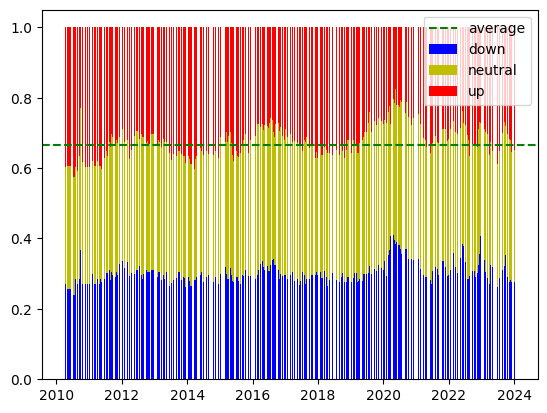

In [78]:
# 전망치 확률의 그래프 출력
prob_data = prob_df 
# 중립 값을 neutral로 설정

total_data_count = len(prob_data)
up_count = len(prob_data['up']) / total_data_count *1.5
neutral_count = len(prob_data['neutral']) / total_data_count *0.5
down_count = len(prob_data['down']) / total_data_count *0
average_height = (down_count + neutral_count + up_count) / 3

plt.bar(prob_data.index, prob_data['down'], label='down', color='b', bottom=0)
plt.bar(prob_data.index, prob_data['neutral'], label='neutral', color='y', bottom=prob_data['down'])
plt.bar(prob_data.index, prob_data['up'], label='up', color='r', bottom=prob_data['down'] + prob_data['neutral'])
plt.axhline(y=average_height, color='g', linestyle='--', label='average')


# 범례 추가
plt.legend()

# 그래프 출력
plt.show()